# Gaussian Mixture

### Import Library

In [1]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

### Load Image

In [2]:
image = cv2.imread("zebra.jpg")
img_h, img_w, img_c = image.shape
image.shape

(391, 586, 3)

Vì mặc định open-cv sử dụng chuẩn màu BGR nên cần chuyển sang RGB để plot ra đúng màu hiển thị :>

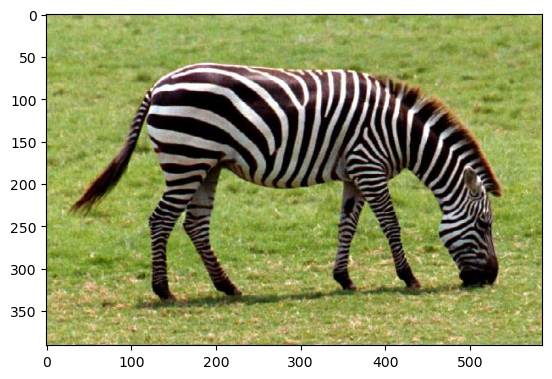

In [3]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [4]:
image_data = image.reshape((-1, 3))
image_data.shape

(229126, 3)

### Gaussian Mixture Model

In [5]:
from sklearn.mixture import GaussianMixture

In [6]:
gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=42)

In [7]:
gmm.fit(image_data)

,n_components,2
,covariance_type,'full'
,tol,0.001
,reg_covar,1e-06
,max_iter,100
,n_init,1
,init_params,'kmeans'
,weights_init,None
,means_init,None
,precisions_init,None
,random_state,42


In [8]:
labels = gmm.predict(image_data)

In [9]:
labels.shape

(229126,)

In [10]:
labels = labels.reshape((img_h, img_w, 1))

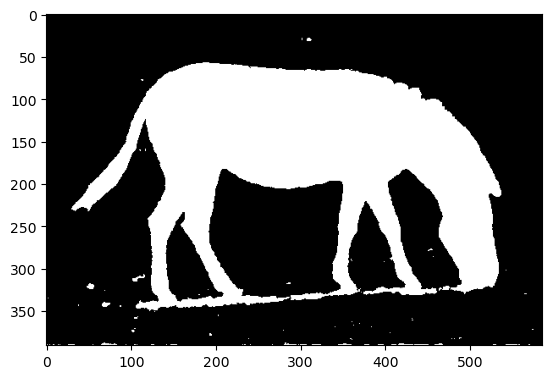

In [11]:
plt.imshow(labels, cmap="gray")

Vì pixel đầu tiên thuộc về nền -> kiểm tra lable của pixel đầu tiên sẽ suy ra được component của nền

In [12]:
labels[0][0][0]

np.int64(0)

### Background Removing

In [13]:
segmented_image = np.zeros_like(image)
segmented_image = np.where(labels == 0, 255, image).astype(np.uint8)

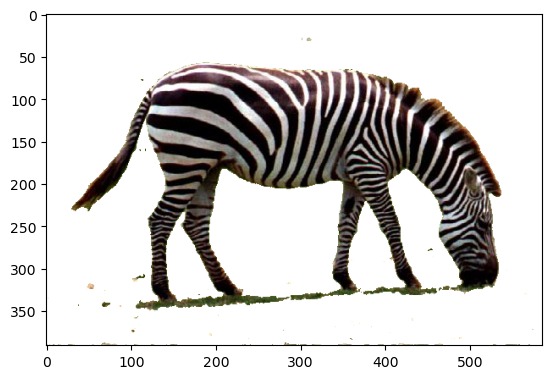

In [14]:
plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))

### Test with another images

In [51]:
def remove_background(image, background_index):
    img_h, img_w, img_c = image.shape
    image_data = image.reshape((-1, 3))
    gmm.fit(image_data)
    labels = gmm.predict(image_data)
    labels = labels.reshape((img_h, img_w, 1))
    segmented_image = np.zeros_like(image)
    segmented_image = np.where(labels == background_index, 255, image).astype(np.uint8)
    return segmented_image

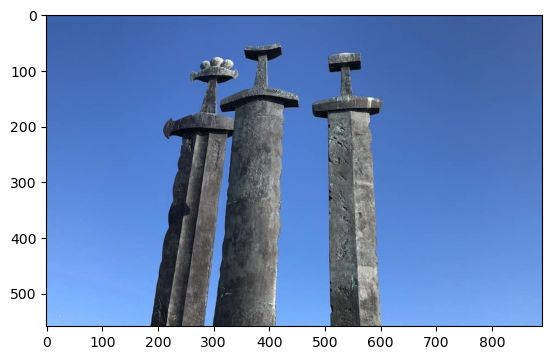

In [52]:
image = cv2.imread("swords.jpeg")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

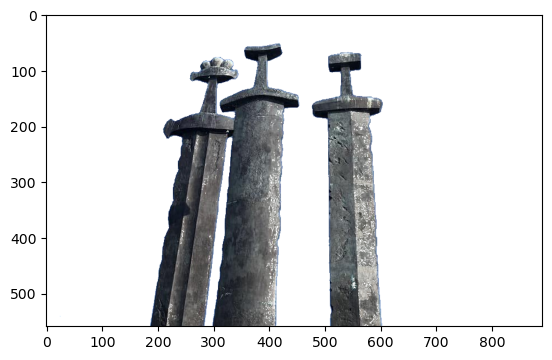

In [53]:
image_rmbg = remove_background(image, 1)
plt.imshow(cv2.cvtColor(image_rmbg, cv2.COLOR_BGR2RGB))